In [1]:
import emip_toolkit as emtk
import filter_fixation as ff
%load_ext autoreload
%autoreload 2

## GazeBase EMIP-Toolkit Instructions
Due to the difference between GazeBase and other datasets, EMIP-Toolkit does not include ``emtk.read_GazeBase()`` method that returns an ``emtk.Experiement`` class. We read fixations and saccades using ``filter_fixation.filter_fixations()``.

In [46]:
path = 'datasets/GazeBase_TEX/Data/S_3004_S2_TEX.csv'

pixel_data = ff.process_GazeBase(path)
fixations, saccades = ff.filter_fixations(pixel_data)

The fixations and saccades are of types ``emtk.Fixation`` and ``emtk.Saccades``.

In [27]:
list(fixations.values())[0]

We use ``emtk.Trial`` **manually** to include fixations and saccades from GazeBase.

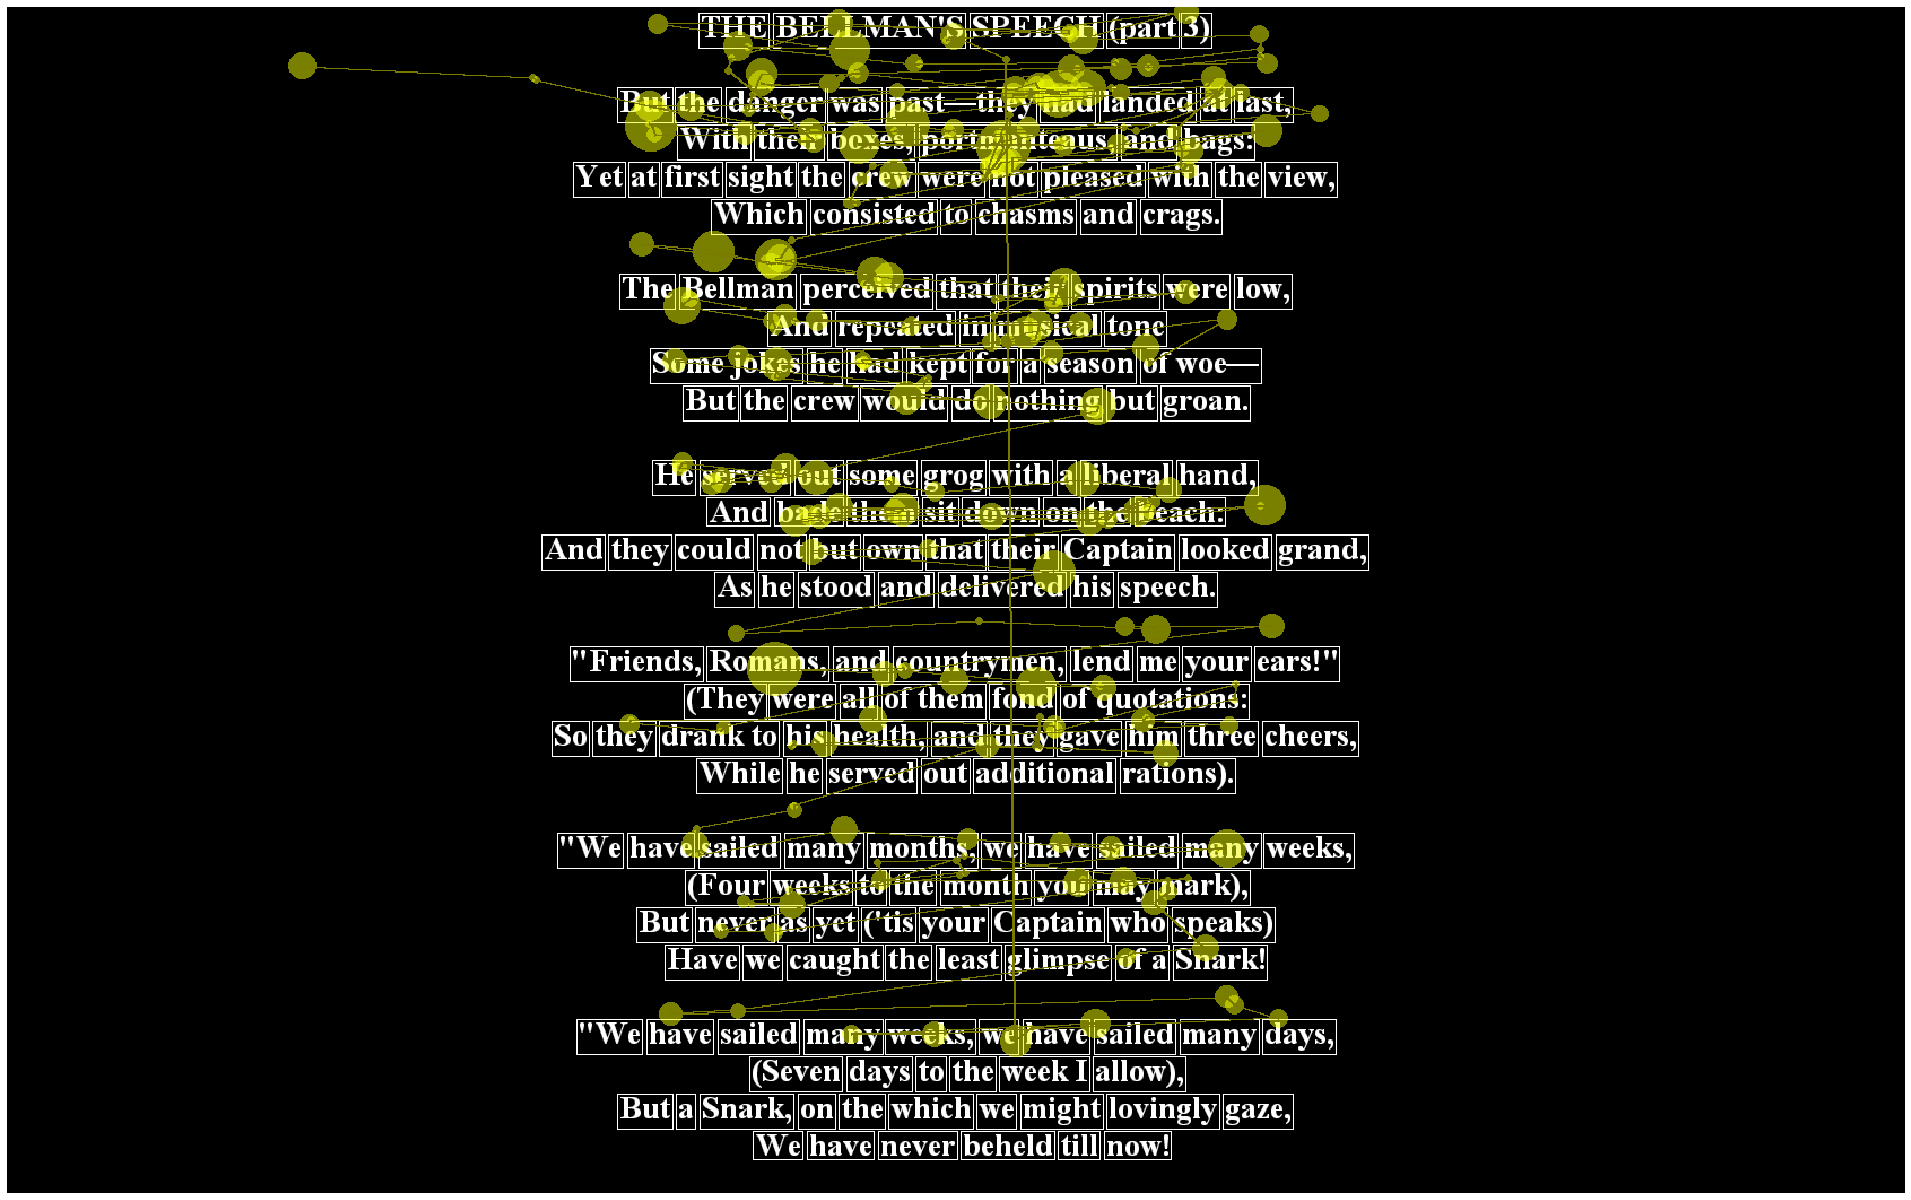

In [47]:
path = path.split('/')[-1]
trial_id = int(path[8])
round_id = path[2]
participant_id = path[3:6]
image = f"TEX_R{round_id}S{trial_id}_bg.png"

trial = emtk.Trial(trial_id=2,
                participant_id="004",
                image="TEX_R3S2_bg.png",
                fixations=fixations,
                saccades=saccades,
                blinks={},
                samples={},
                eye_tracker="EyeLink1000_")

image_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXScreenshots/'
trial.draw_trial(image_path=image_path, draw_saccade=True, draw_aoi=True, draw_number=False)

### Set offset on Fixations and Saccades

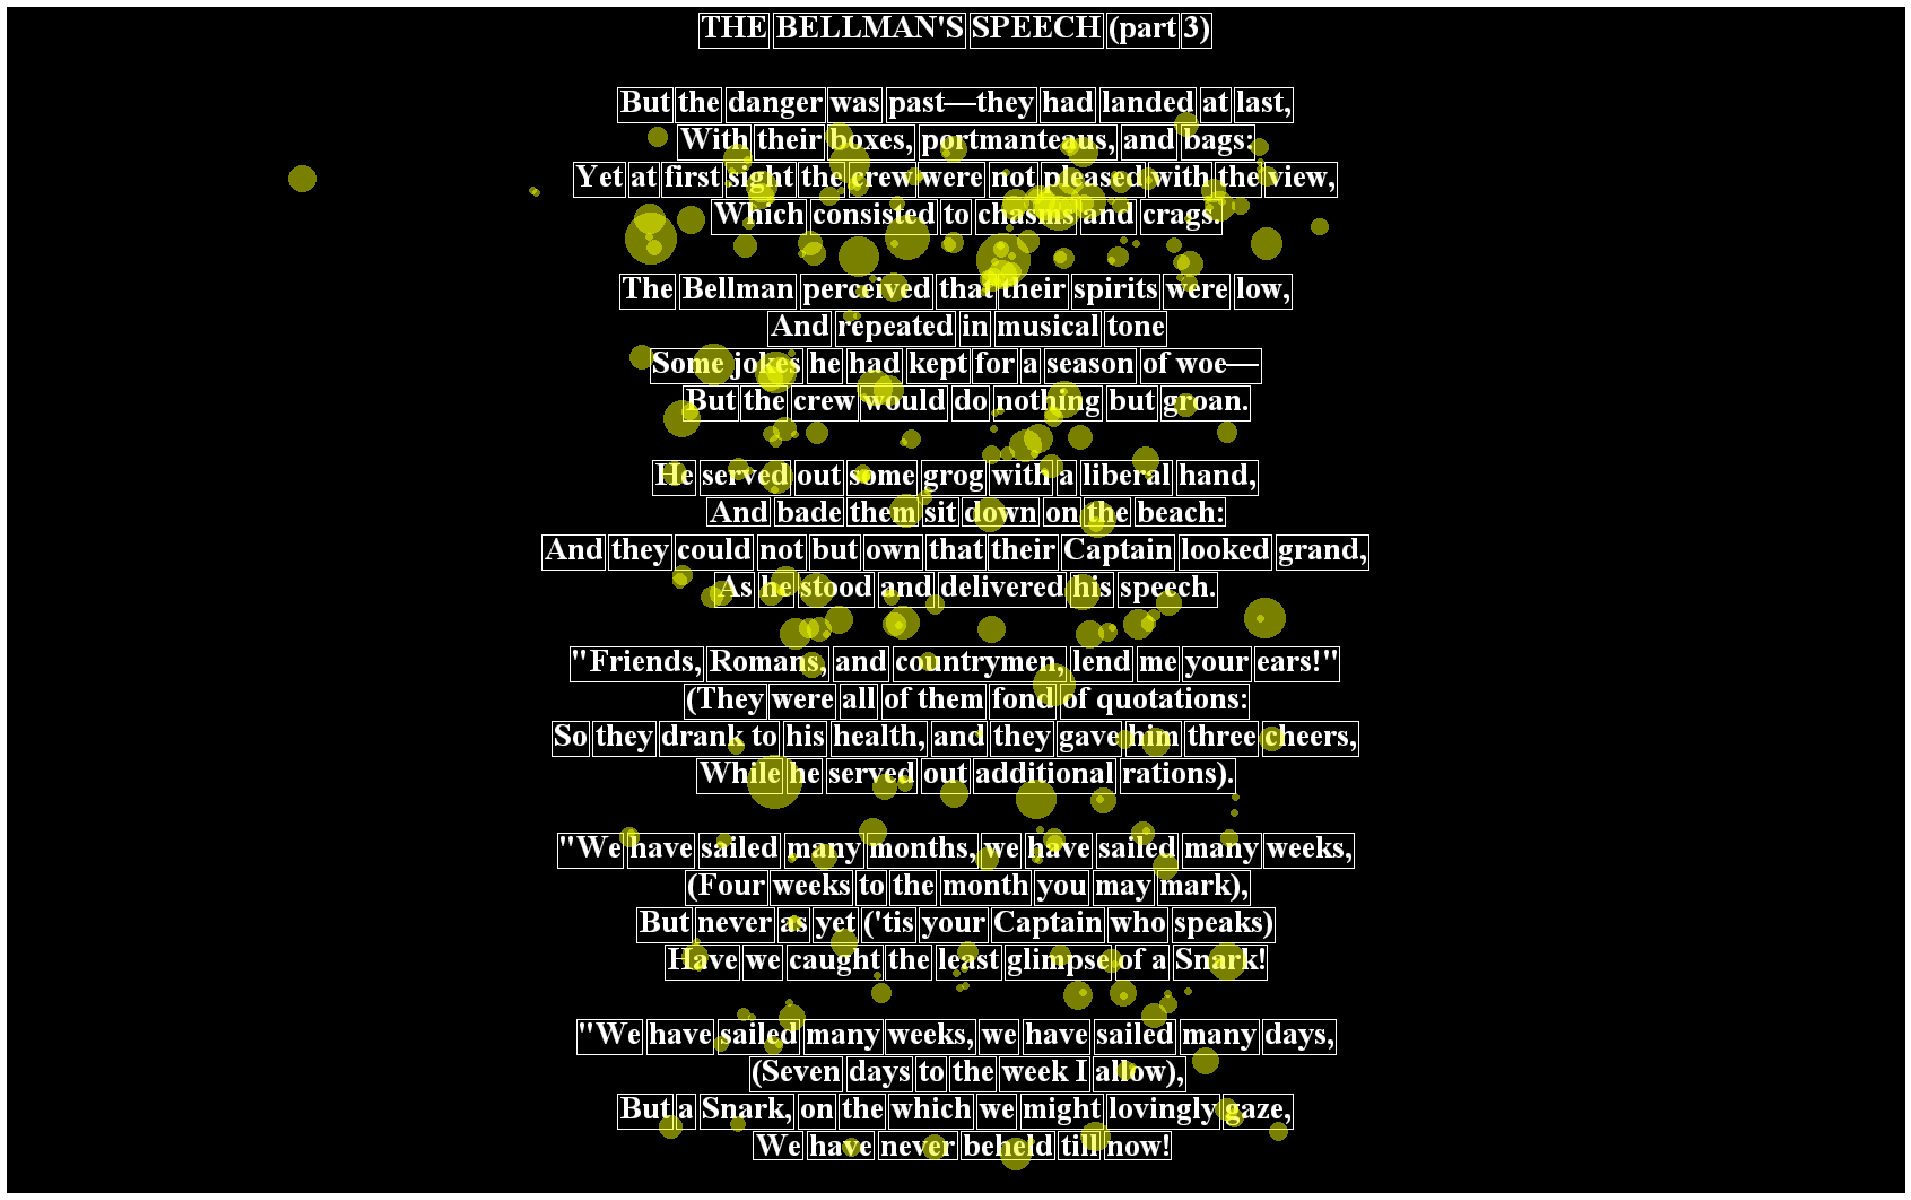

In [39]:
trial.sample_offset(0, 100)
trial.draw_trial(image_path=image_path, draw_aoi=True)

### Reset offsets

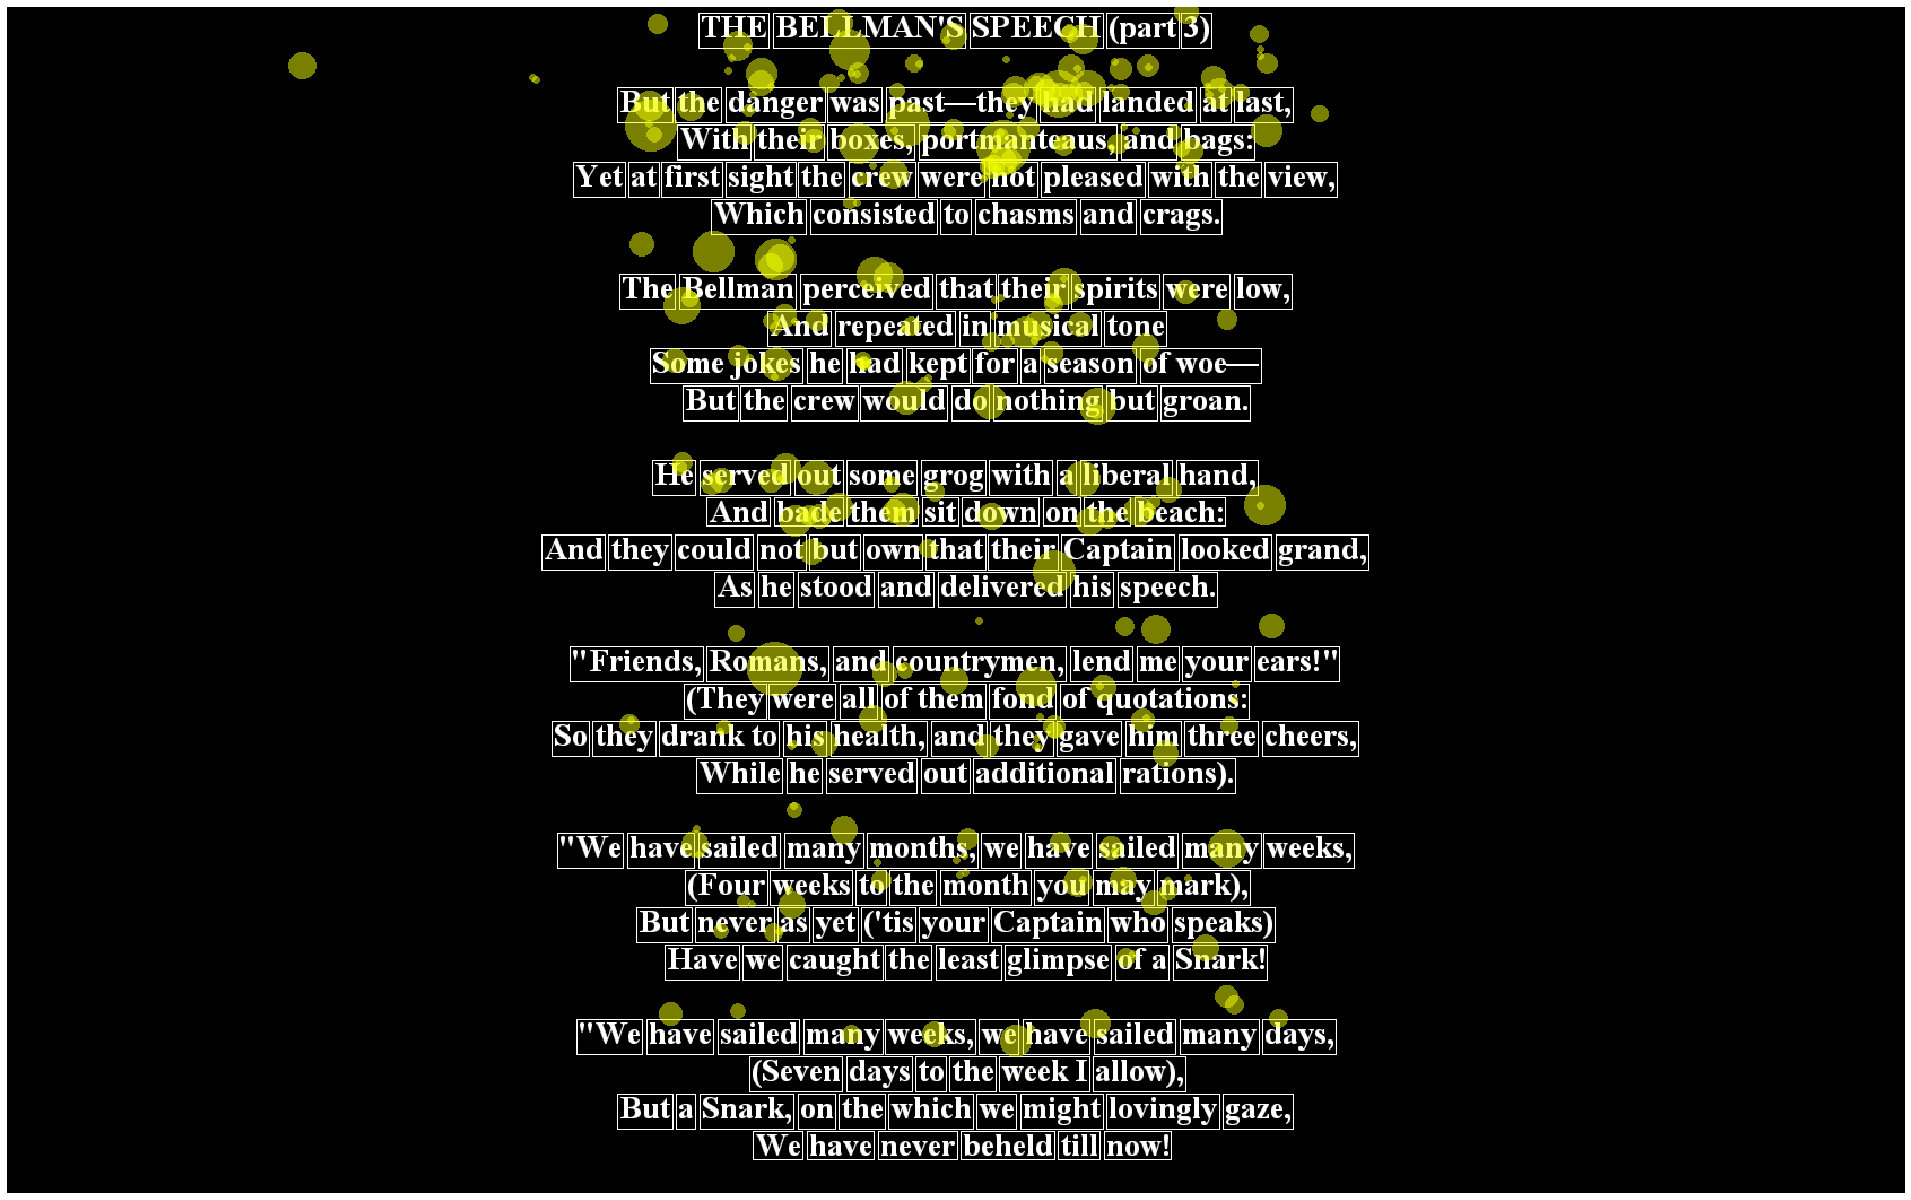

In [40]:
trial.reset_offset()
trial.draw_trial(image_path=image_path, draw_aoi=True)

### Find AOI

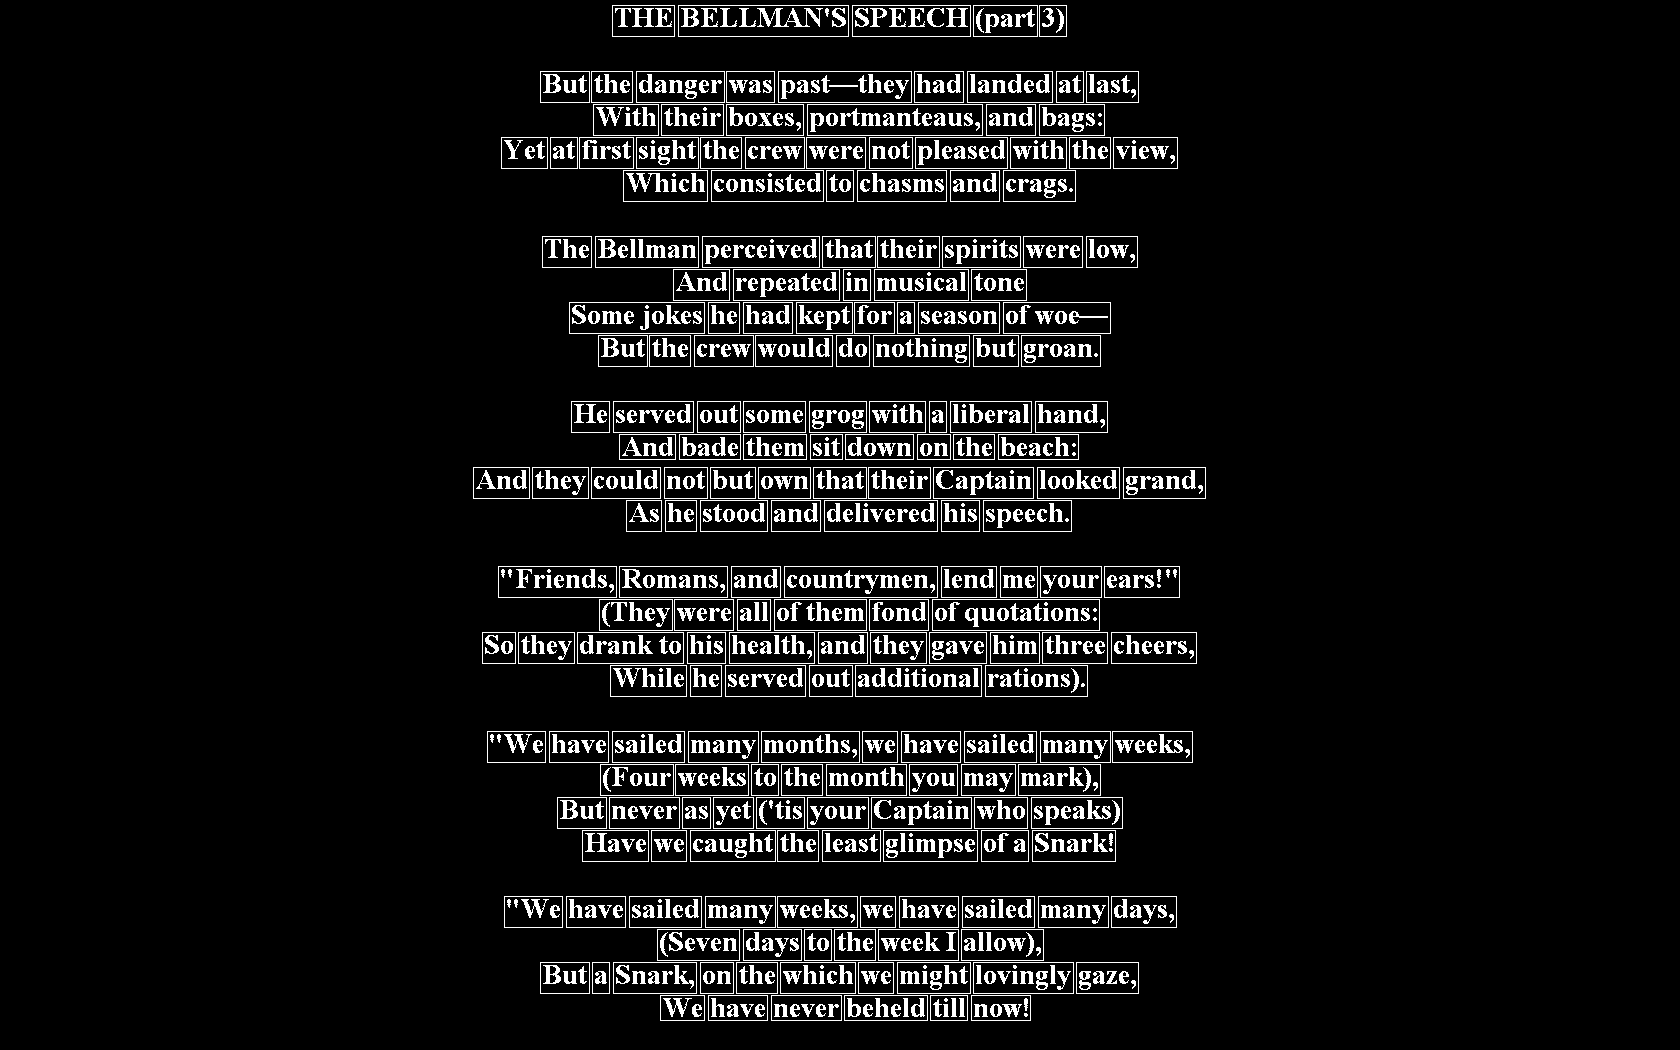

In [41]:
aoi = emtk.find_aoi(image='TEX_R3S2_bg.png', image_path=image_path)
emtk.draw_aoi(aoi, image='TEX_R3S2_bg.png', image_path=image_path)

In [42]:
aoi.head()

,kind,name,x,y,width,height,local_id,image
0,sub-line,line 1 part 1,612.5,5,63,32,NaN,TEX_R3S2_bg.png
1,sub-line,line 1 part 2,678.5,5,171,32,NaN,TEX_R3S2_bg.png
2,sub-line,line 1 part 3,852.5,5,119,32,NaN,TEX_R3S2_bg.png
3,sub-line,line 1 part 4,973.5,5,65,32,NaN,TEX_R3S2_bg.png
4,sub-line,line 1 part 5,1039.5,5,28,32,NaN,TEX_R3S2_bg.png


### Add tokens to AOI

In [43]:
file_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXTexts/'
aoi_token = emtk.add_tokens_to_AOIs(file_path=file_path, aois_raw=aoi)
aoi_token

,kind,name,x,y,width,height,local_id,image,token
0,sub-line,line 1 part 1,612.5,5,63,32,NaN,TEX_R3S2_bg.png,THE
1,sub-line,line 1 part 2,678.5,5,171,32,NaN,TEX_R3S2_bg.png,BELLMAN'S
2,sub-line,line 1 part 3,852.5,5,119,32,NaN,TEX_R3S2_bg.png,SPEECH
3,sub-line,line 1 part 4,973.5,5,65,32,NaN,TEX_R3S2_bg.png,(part
4,sub-line,line 1 part 5,1039.5,5,28,32,NaN,TEX_R3S2_bg.png,3)
...,...,...,...,...,...,...,...,...,...
195,sub-line,line 25 part 2,708.5,995,60,26,NaN,TEX_R3S2_bg.png,have
196,sub-line,line 25 part 3,771.5,995,71,26,NaN,TEX_R3S2_bg.png,never
197,sub-line,line 25 part 4,844.5,995,84,26,NaN,TEX_R3S2_bg.png,beheld
198,sub-line,line 25 part 5,930.5,995,38,26,NaN,TEX_R3S2_bg.png,till


### Hit Test

In [45]:
df = emtk.hit_test(trial, aoi_token)

all fixations: 271


In [26]:
df.to_csv('Hit Test Result.csv')